# Random Walk Metropolis Hastings
This script provides a basic implementation of the Random Walk Metropolis Hastings algorithm. A simple 1-dimensional Gaussian Mixture Model is employed as test distribution to sample from.

## Import some necessary packages

In [1]:
import numpy as np

from model.gmm import GaussianMixtureModel1D
from util.util import trace, plot_distribution

## Implementation of the actual algorithm
A central step of the Metropolis Hastings algorithm is the computation of the acceptance probability $\alpha = \min\left(1, \frac{p(x')Q(x|x')}{p(x)Q(x'|x)}\right)$ for a new proposal state $x'$. In the case of Random Walk Metropolis Hastings we choose a simple Gaussian as proposal distribution, i.e. $p(x)=\mathcal{N}(0, \sigma)$, which is a symmetric distribution. Thus, the computation of $\alpha$ simplifies to $\alpha = \min\left(1, \frac{p(x')}{p(x)}\right)$. The algorithm is then also called just "Metropolis". Other than that, the below code should be quite self-explanatory. 

In [2]:
class RandomWalkMetropolisHastings:
    def __init__(self, model, sigma=0.5):
        self.model = model
        self.sigma = sigma

    def sample(self, num_samples, burnin=100):
        samples = []
        num_trials = 0
        current_x = np.random.uniform(-2, 2)
        current_prob = self.model(current_x)

        while(len(samples) < num_samples):
            # Query the proposal distribution for a new state
            proposal = current_x + np.random.normal(0, self.sigma)
            proposal_prob = self.model(proposal)
    
            # Compute the acceptance probility
            alpha = proposal_prob / current_prob
            alpha = min(1.0, alpha)

            # Flip a coin if the proposal should be accepted
            if np.random.binomial(1, alpha, 1):
                if num_trials > burnin:
                    samples.append(proposal)
                current_x = proposal
                current_prob = proposal_prob
            else:
                if num_trials > burnin:
                    samples.append(current_x)
            num_trials += 1
        return np.stack(samples)

## Run algorithm on some test distribution
We employ a simple 1-dimensional Gaussian-Mixture-Model as test distribution. We then instantiate the Random Walk Metropolis Hastings algorithm and sample from the GMM.

In [3]:
model = GaussianMixtureModel1D(means=[-0.9, 0.7], sigmas=[0.2, 0.6])
rwmh = RandomWalkMetropolisHastings(model, sigma=1.0)

samples = rwmh.sample(num_samples=1000, burnin=100)

# Visualize results
Let's visualize the results. The function "trace" plots a complete trace of all samples over time alongside the target and estimated distribution on the left side. Additionally, the KL divergence is plottet over time to give a feeling for the algorithm's convergence behaviour.

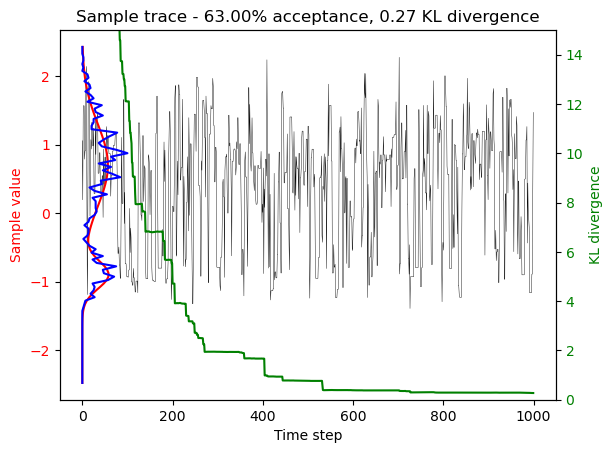

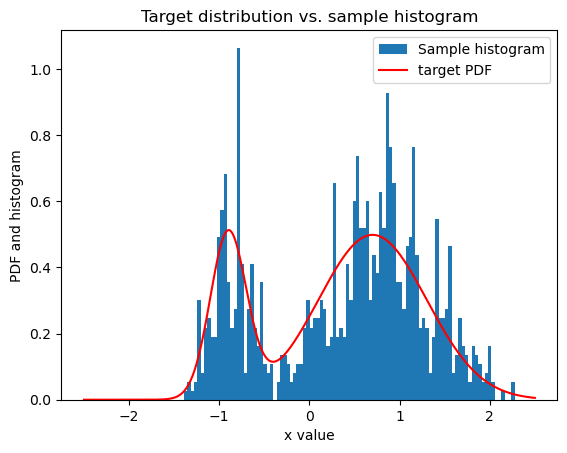

In [4]:
trace(model, samples)
plot_distribution(model, samples)